In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# 픽셀 값을 0-1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# 컨벌루션 신경망 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.9947 - loss: 0.0172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9963 - loss: 0.0107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9969 - loss: 0.0097
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - accuracy: 0.9977 - loss: 0.0077
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 41ms/step - accuracy: 0.9978 - loss: 0.0067


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 예측 수행
y_pred_probs = model.predict(test_images)
y_pred_class = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [23]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n 테스트 정확도: {test_acc:.4f}")
print(f" 테스트 손실: {test_loss:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.9910 - loss: 0.0338

 테스트 정확도: 0.9910
 테스트 손실: 0.0338


In [24]:
# 분류 리포트
print(" Classification Report:\n")
print(classification_report(test_labels, y_pred_class, digits=4))

 Classification Report:

              precision    recall  f1-score   support

           0     0.9959    0.9959    0.9959       980
           1     0.9947    0.9965    0.9956      1135
           2     0.9865    0.9922    0.9894      1032
           3     0.9901    0.9941    0.9921      1010
           4     0.9939    0.9888    0.9913       982
           5     0.9855    0.9888    0.9871       892
           6     0.9947    0.9875    0.9911       958
           7     0.9922    0.9883    0.9903      1028
           8     0.9888    0.9949    0.9918       974
           9     0.9871    0.9822    0.9846      1009

    accuracy                         0.9910     10000
   macro avg     0.9909    0.9909    0.9909     10000
weighted avg     0.9910    0.9910    0.9910     10000



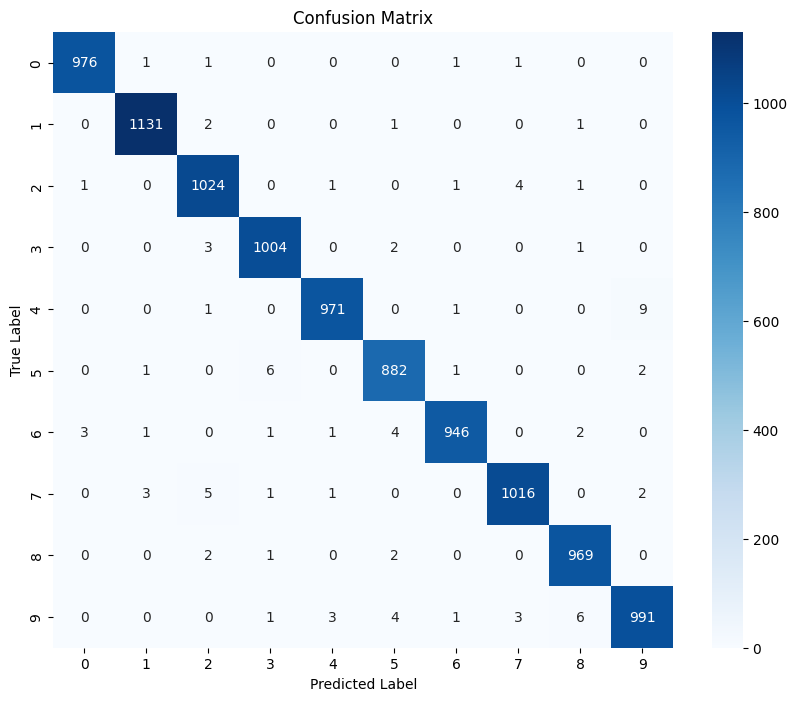

In [25]:
# 혼동 행렬
cm = confusion_matrix(test_labels, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

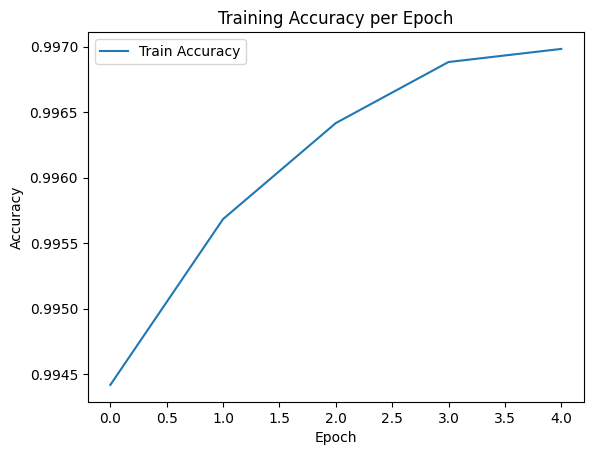

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()